# Cluster Analysis

In this notebook, I create clusters of the census tracts within our 6 neighborhoods of interest and visualize and analyze the clusters using radar plots and maps. I create several different clusters with and without dummy variables for the neighborhoods, and map the clusters next to Urban Displacement Project's gentrification typology. I am able to draw some conclusions about how the census data indicators relate to rate/trajectory of neighborhood change (using UDP's typology as a guidepost). 

In [384]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame

I start by bringing in my cleaned and condensed dataset with the census tracts, typologies, and census data. I turn it into a geodataframe.

In [385]:
variables = pd.read_csv('Census_neighborhoods_UDP_condensed.csv')

In [386]:
variables
variables.reset_index()

,index,Unnamed: 0,name,geometry,GEOID,Typology,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change
0,0,0,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037210e+09,Advanced Gentrification,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215
1,1,1,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037209e+09,Early/Ongoing Gentrification,-0.139194,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439
2,2,2,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037211e+09,Early/Ongoing Gentrification,0.003922,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059
3,3,3,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037193e+09,Early/Ongoing Gentrification,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466
4,4,4,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037208e+09,At Risk of Gentrification,-0.051724,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,128,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037221e+09,Low-Income/Susceptible to Displacement,-0.142857,0.191313,-0.122242,0.439254,2.580590,0.149347,1.859356,-0.411594,0.563381
129,129,129,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037221e+09,At Risk of Gentrification,0.096346,0.510638,0.113036,0.497703,NaN,0.196023,NaN,0.270798,0.645893
130,130,130,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037210e+09,Advanced Gentrification,-0.110837,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833
131,131,131,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037210e+09,At Risk of Gentrification,0.130435,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598


In [387]:
variables = variables.drop(columns={'Unnamed: 0'})

In [388]:
type(variables)

pandas.core.frame.DataFrame

In [389]:
variables.geometry

0      POLYGON ((-118.259080190068 34.0538938556827, ...
1      POLYGON ((-118.259080190068 34.0538938556827, ...
2      POLYGON ((-118.259080190068 34.0538938556827, ...
3      POLYGON ((-118.259080190068 34.0538938556827, ...
4      POLYGON ((-118.259080190068 34.0538938556827, ...
                             ...                        
128    POLYGON ((-118.281458193635 34.0525018538312, ...
129    POLYGON ((-118.281458193635 34.0525018538312, ...
130    POLYGON ((-118.281458193635 34.0525018538312, ...
131    POLYGON ((-118.281458193635 34.0525018538312, ...
132    POLYGON ((-118.281458193635 34.0525018538312, ...
Name: geometry, Length: 133, dtype: object

In [390]:
variables['geometry'] = gpd.GeoSeries.from_wkt(variables['geometry'])
variablesGdf = gpd.GeoDataFrame(variables, geometry='geometry')

In [391]:
type(variablesGdf)

geopandas.geodataframe.GeoDataFrame

## Clustering

I then exclude irrelevant and non-numeric columns from my dataset. This reduces my dataset to 128 columns. I use KMeans from scikit-learn to create 5 clusters. I examine the clusters to see how well/if at all the neighbors are distributed across them. 

In [392]:
variablesGdf = variablesGdf.dropna()
variablesGdf2 = variablesGdf.drop(columns={'name', 'geometry', 'GEOID', 'Typology'})

In [393]:
variablesGdf2

,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change
0,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215
1,-0.139194,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439
2,0.003922,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059
3,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466
4,-0.051724,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777
...,...,...,...,...,...,...,...,...,...
127,-0.107784,0.432039,0.055124,0.818795,0.418684,0.452437,0.132920,0.485507,2.308710
128,-0.142857,0.191313,-0.122242,0.439254,2.580590,0.149347,1.859356,-0.411594,0.563381
130,-0.110837,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833
131,0.130435,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598


In [394]:
from sklearn.cluster import KMeans

In [395]:
variablesGdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 128 entries, 0 to 132
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Total_hh_percent_change                           128 non-null    float64
 1   rent_percent_change                               128 non-null    float64
 2   rent_percent_change_inflation                     128 non-null    float64
 3   income_family_percent_change                      128 non-null    float64
 4   income_nonfamily_percent_change                   128 non-null    float64
 5   median_income_family_percent_change_inflation     128 non-null    float64
 6   median_income_nonfamily_percent_change_inflation  128 non-null    float64
 7   white_pop_percent_change                          128 non-null    float64
 8   bachelorsplus_percent_change                      128 non-null    float64
dtypes: float64(9)


In [396]:
type(variablesGdf2)

geopandas.geodataframe.GeoDataFrame

In [397]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(variablesGdf2)
print(kmeans)

KMeans(n_clusters=5, random_state=0)


In [398]:
kmeans.labels_

array([4, 4, 4, 0, 3, 1, 3, 1, 4, 4, 4, 4, 1, 4, 0, 0, 3, 1, 0, 4, 1, 1,
       4, 4, 1, 0, 1, 1, 0, 2, 4, 4, 0, 0, 1, 4, 0, 3, 4, 0, 4, 3, 1, 0,
       1, 3, 1, 4, 0, 0, 1, 1, 4, 4, 4, 4, 3, 4, 0, 4, 1, 3, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0, 4, 1, 1, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 1, 2,
       4, 3, 1, 1, 4, 4, 4, 1, 1, 4, 0, 4, 4, 1, 3, 1, 4, 1], dtype=int32)

In [399]:
print(kmeans.labels_.shape)
print(len(variablesGdf2))

(128,)
128


In [400]:
variablesGdf['cluster_id'] = kmeans.labels_

In [401]:
variablesGdf.groupby('cluster_id').size()

cluster_id
0    28
1    26
2     2
3    10
4    62
dtype: int64

In [402]:
cluster0 = variablesGdf[variablesGdf['cluster_id']==0]

In [403]:
print(len(cluster0))

28


In [404]:
cluster0[cluster0['name']=='Westlake']

,name,geometry,GEOID,Typology,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
3,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466,0
14,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,At Risk of Gentrification,0.081967,0.267550,-0.066072,0.475555,1.061074,0.178336,0.645915,-0.054756,0.383197,0
15,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,-0.067873,0.496855,0.102880,1.610334,-0.179423,1.084538,-0.344711,-0.031992,1.153208,0
18,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,-0.022581,0.451250,0.069279,0.783244,1.266682,0.424048,0.810108,-0.031200,1.432774,0


In [405]:
cluster0[cluster0['name']=='Echo Park']

,name,geometry,GEOID,Typology,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
34,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037198e+09,Advanced Gentrification,-0.058394,0.978842,0.458007,0.509431,0.868628,0.205388,0.492233,0.612166,0.316261,0
38,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037197e+09,Advanced Gentrification,0.013699,0.543561,0.137293,1.138032,1.137332,0.707371,0.706812,0.287306,0.367838,0
41,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037197e+09,Advanced Gentrification,-0.026667,0.356240,-0.000725,1.261875,0.259848,0.806269,0.006078,0.089019,0.175833,0
45,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037198e+09,Advanced Gentrification,-0.180505,0.329982,-0.020072,0.832312,0.744170,0.463232,0.392844,0.344270,0.720254,0


In [406]:
cluster0[cluster0['name']=='Koreatown']

,name,geometry,GEOID,Typology,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
78,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Low-Income/Susceptible to Displacement,-0.065934,0.496629,0.102714,1.306239,0.313879,0.841696,0.049226,0.413720,0.430423,0
80,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Ongoing Displacement,-0.072414,0.407266,0.036871,0.866694,0.510336,0.490689,0.206111,0.621137,-0.159828,0
83,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037193e+09,Low-Income/Susceptible to Displacement,0.003205,0.419869,0.046157,0.703497,0.615779,0.360364,0.290315,0.440740,-0.280932,0
85,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037193e+09,Early/Ongoing Gentrification,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466,0
87,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037192e+09,Advanced Gentrification,0.032710,0.575785,0.161036,1.682201,0.199017,1.141929,-0.042499,0.046256,0.251940,0
92,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037212e+09,Ongoing Displacement,-0.025641,0.488987,0.097083,0.875523,1.582614,0.497739,1.062402,0.622518,0.304816,0
106,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037212e+09,Early/Ongoing Gentrification,-0.191176,0.406639,0.036409,0.733146,0.577142,0.384041,0.259460,0.492736,0.122801,0
108,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Early/Ongoing Gentrification,-0.044369,0.451501,0.069464,0.769360,0.469872,0.412960,0.173798,0.101331,0.165816,0
110,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Early/Ongoing Gentrification,0.003690,0.500559,0.105609,0.782666,0.193749,0.423586,-0.046706,0.093443,0.711050,0


In [407]:
cluster0.groupby('name').size()

name
Downtown       3
Echo Park      4
Koreatown      9
Pico-Union     1
Silver Lake    7
Westlake       4
dtype: int64

In [408]:
cluster0.groupby('Typology').size()

Typology
Advanced Gentrification                   12
At Risk of Gentrification                  2
Early/Ongoing Gentrification               9
Low-Income/Susceptible to Displacement     2
Ongoing Displacement                       2
Stable Moderate/Mixed Income               1
dtype: int64

In [409]:
cluster1 = variablesGdf[variablesGdf['cluster_id']==1]

In [410]:
cluster1.groupby('name').size()

name
Downtown       3
Echo Park      4
Koreatown      2
Pico-Union     8
Silver Lake    3
Westlake       6
dtype: int64

In [411]:
cluster1.groupby('Typology').size()

Typology
Advanced Gentrification                   7
At Risk of Gentrification                 6
Early/Ongoing Gentrification              7
Low-Income/Susceptible to Displacement    3
Ongoing Displacement                      3
dtype: int64

In [412]:
cluster2 = variablesGdf[variablesGdf['cluster_id']==2]

In [413]:
cluster2.groupby('name').size()

name
Downtown      1
Pico-Union    1
dtype: int64

In [414]:
cluster2.groupby('Typology').size()

Typology
Ongoing Displacement    2
dtype: int64

In [415]:
cluster3 = variablesGdf[variablesGdf['cluster_id']==3]

In [416]:
cluster3.groupby('name').size()

name
Echo Park      3
Pico-Union     2
Silver Lake    2
Westlake       3
dtype: int64

In [417]:
cluster3.groupby('Typology').size()

Typology
Advanced Gentrification                   3
At Risk of Gentrification                 2
Early/Ongoing Gentrification              3
Low-Income/Susceptible to Displacement    1
Ongoing Displacement                      1
dtype: int64

In [418]:
cluster4 = variablesGdf[variablesGdf['cluster_id']==4]

In [419]:
cluster4.groupby('name').size()

name
Downtown        2
Echo Park       3
Koreatown      25
Pico-Union      9
Silver Lake    12
Westlake       11
dtype: int64

In [420]:
cluster4.groupby('Typology').size()

Typology
Advanced Gentrification                   13
At Risk of Gentrification                  2
Becoming Exclusive                         3
Early/Ongoing Gentrification              27
Low-Income/Susceptible to Displacement     9
Ongoing Displacement                       3
Stable Moderate/Mixed Income               4
Stable/Advanced Exclusive                  1
dtype: int64

I create a radar plot to visualize the five clusters.

In [421]:
import seaborn as sns

In [422]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


In [423]:
def radar_plot(kmeans, variablesGdf2):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in variablesGdf2.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

Cluster 0, which includes 28 census tracts, has relatively even percent change across the indicators with a slightly larger change in rents. Cluster 1 includes 26 census tracts, which have the second highest change in the percent of people with bachelor's degrees and white population. Cluster 2 includes only 2 census tracts which are characterized by an extremely large change in the percent of people with bachelor's degrees and the percent of white people. Cluster 3 includes 10 census tracts and has large percent change in median nonfamily income with and without inflation and rents. Cluster 4 is the largest cluster with 62 census tracts. It includes census tracts that have the shown the least amount of change in the indicators over time. 

Overall, it appears clusters 0 and 4, which make up the majority of the census tracts (90 census tracts in total), are the most stable over the 10 year period, meaning they are likely stable or already underwent full gentrification before 2010. The other 3 clusters represent varying degrees of neighborhood change with cluster 2 exhibiting the most dramatic change in demographics and rent, cluster 1 exhibiting some change in demographics, and cluster 3 exhibiting dramatic change in nonfamily income. 

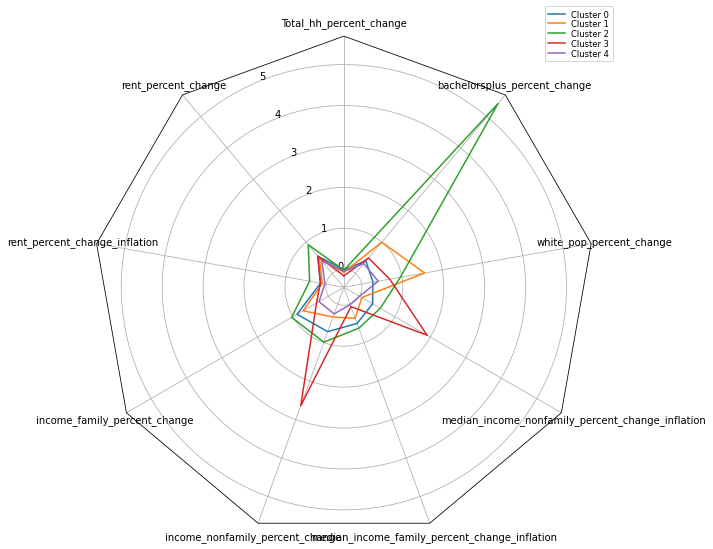

In [424]:
radar_plot (kmeans, variablesGdf2)

## Mapping Clusters

Next, I map the 5 clusters to see if I can identify spatial patterns. I join the base dataset to a census tract boundary file to execute the map.

In [425]:
census_tracts = gpd.read_file('Census_Tracts_2020.geojson')
census_tracts

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."
...,...,...,...,...,...,...
2490,2491,980035,9800.35,1.716394e+08,107459.157092,"POLYGON ((-117.98268 34.04469, -117.98287 34.0..."
2491,2492,980036,9800.36,9.425460e+07,67746.068379,"POLYGON ((-118.07027 34.05725, -118.07073 34.0..."
2492,2493,980037,9800.37,1.402219e+07,15116.000420,"POLYGON ((-118.28411 33.80773, -118.28447 33.8..."
2493,2494,980038,9800.38,4.861673e+07,42991.767229,"POLYGON ((-118.36674 34.01539, -118.36673 34.0..."


In [426]:
census_tracts['GEOID'] ='6037' + census_tracts['CT20']
census_tracts.GEOID

0       6037101110
1       6037101122
2       6037101220
3       6037101221
4       6037101222
           ...    
2490    6037980035
2491    6037980036
2492    6037980037
2493    6037980038
2494    6037980039
Name: GEOID, Length: 2495, dtype: object

In [427]:
census_tracts['GEOID'] = census_tracts.GEOID.astype(float)

In [428]:
variablesGdf_final = variablesGdf.merge(
    census_tracts, 
    on=["GEOID"], 
    how="left",
    indicator=True,
)
variablesGdf_final

,name,geometry_x,GEOID,Typology,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,...,white_pop_percent_change,bachelorsplus_percent_change,cluster_id,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry_y,_merge
0,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,...,0.648831,0.916215,4,639,210010,2100.10,4.402120e+06,8907.430264,"POLYGON ((-118.27259 34.04308, -118.27243 34.0...",both
1,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,-0.139194,0.270859,-0.063634,0.376511,0.009882,0.099242,...,-0.126527,0.011439,4,631,209300,2093.00,3.297116e+06,7931.222369,"POLYGON ((-118.26652 34.04788, -118.26642 34.0...",both
2,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,0.003922,0.444040,0.063966,0.190279,0.329279,-0.049477,...,0.899744,0.113059,4,642,211122,2111.22,3.934734e+06,8274.051868,"POLYGON ((-118.29051 34.07633, -118.29170 34.0...",both
3,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,...,0.545329,0.577466,0,501,192700,1927.00,5.717757e+06,9614.054322,"POLYGON ((-118.28442 34.07715, -118.28442 34.0...",both
4,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,-0.051724,0.361851,0.003410,0.682266,3.261550,0.343410,...,0.975671,0.734777,3,611,208302,2083.02,4.735707e+06,9852.781004,"POLYGON ((-118.25966 34.06201, -118.25974 34.0...",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037222e+09,Early/Ongoing Gentrification,-0.107784,0.432039,0.055124,0.818795,0.418684,0.452437,...,0.485507,2.308710,1,752,221710,2217.10,3.530350e+06,8106.015673,"POLYGON ((-118.28402 34.03683, -118.28402 34.0...",both
124,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,Low-Income/Susceptible to Displacement,-0.142857,0.191313,-0.122242,0.439254,2.580590,0.149347,...,-0.411594,0.563381,3,741,221120,2211.20,3.417543e+06,7524.851759,"POLYGON ((-118.28413 34.04184, -118.28414 34.0...",both
125,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,-0.110837,0.253197,-0.076647,0.688634,-0.040333,0.348495,...,1.007048,0.903833,1,638,209820,2098.20,1.927868e+06,5690.534786,"POLYGON ((-118.27668 34.04519, -118.27651 34.0...",both
126,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,0.130435,0.458671,0.074746,0.181293,0.413179,-0.056653,...,0.229048,0.036598,4,637,209810,2098.10,1.612738e+06,5415.906958,"POLYGON ((-118.28041 34.04819, -118.28061 34.0...",both


In [429]:
variablesGdf_final = variablesGdf_final.drop(columns=['geometry_x', 'OBJECTID', 'CT20','LABEL', 'ShapeSTArea','ShapeSTLength', '_merge'])

In [430]:
variablesGdf_final = variablesGdf_final.rename(columns={'geometry_y':'geometry'})

In [431]:
type(variablesGdf_final)

pandas.core.frame.DataFrame

In [432]:
from geopandas import GeoDataFrame
variablesGdf_final = GeoDataFrame(variablesGdf_final, crs="EPSG:3857", geometry='geometry')

In [433]:
type(variablesGdf_final)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

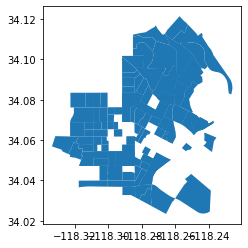

In [434]:
variablesGdf_final.plot()

When we map the clusters, we see that cluster 4 (a cluster with some of the more stable census tracts) appear to be grouped on the outskirts of the map in the north, west, and south. Cluster 1, which includes census tracts with some deomgraphic change, appears to be concentrated in the southern part of the map. Clusters 0 and 1 appear to be sprinkled throughout. 

Text(0.5, 1.0, 'Clusters of Gentrification Indicators')

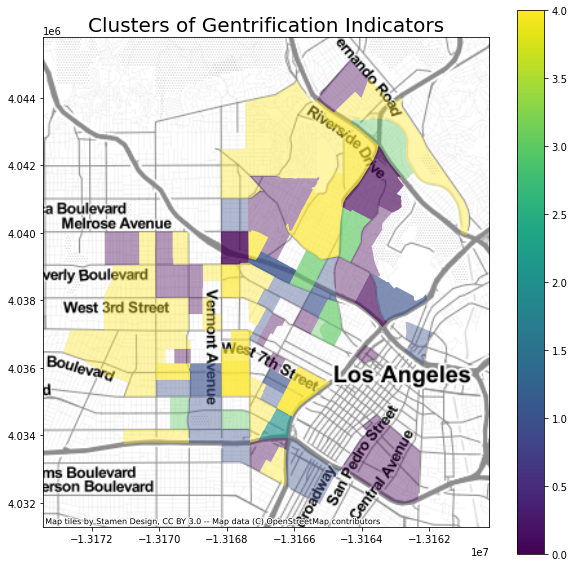

In [435]:
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

variablesGdf_final.to_crs('EPSG:3857').plot('cluster_id', legend=True, ax = ax, alpha=0.4)
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax.set_title('Clusters of Gentrification Indicators', fontsize=20)

I am curious about how this cluster map compares with a map of the Urban Displacement Project's gentrification typologies. I convert UDP's 8 typologies into a numeric scale and map it to compare to the cluster map.

In [436]:
variablesGdf_final.groupby('Typology').size()

Typology
Advanced Gentrification                   35
At Risk of Gentrification                 12
Becoming Exclusive                         3
Early/Ongoing Gentrification              46
Low-Income/Susceptible to Displacement    15
Ongoing Displacement                      11
Stable Moderate/Mixed Income               5
Stable/Advanced Exclusive                  1
dtype: int64

In [437]:
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology']

In [438]:
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Advanced Gentrification'],
                                                                                        '8')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['At Risk of Gentrification'],
                                                                                        '7')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Becoming Exclusive'],
                                                                                        '6')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Early/Ongoing Gentrification'],
                                                                                        '5')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Low-Income/Susceptible to Displacement'],
                                                                                        '4')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Ongoing Displacement'],
                                                                                        '3')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Stable Moderate/Mixed Income'],
                                                                                        '2')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Stable/Advanced Exclusive'],
                                                                                        '1')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Unavailable or Unreliable Data'],
                                                                                        '0')

In [439]:
variablesGdf_final['Typology_numeric'] = variablesGdf_final.Typology_numeric.astype(float)

This map is a bit easier to decipher. We see that census tracts in the late throws of gentrification are concentrated in the northeast and a bit in the south. Stable cenuss tracts (with varying degrees of risk) are concentrated in the central part of the map. This all makes sense given the trajectory of Echo Park (in the northeast) and Westlake (in the central/south) in terms of neighborhood change. 

Text(0.5, 1.0, 'Urban Displacement Project: Displacement Risk Index')

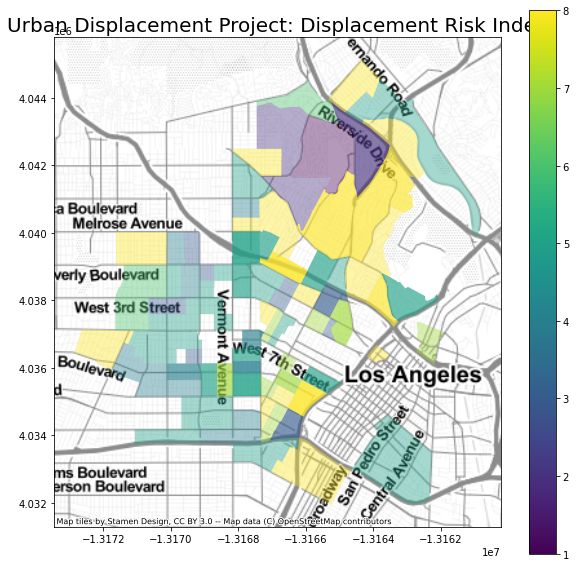

In [440]:
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

variablesGdf_final.to_crs('EPSG:3857').plot('Typology_numeric', legend=True, ax = ax, alpha=0.4)
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax.set_title('Urban Displacement Project: Displacement Risk Index', fontsize=20)

I place both maps side by side to see if there are any discernable patterns. The maps are on different scales: while Urban Displacement Project's map is on an 8 point scale, the cluster map is on a 4 point scale. I make adjustments to the scale and interpret the results in the next section. 

Text(0.5, 1.0, 'Urban Displacement Project')

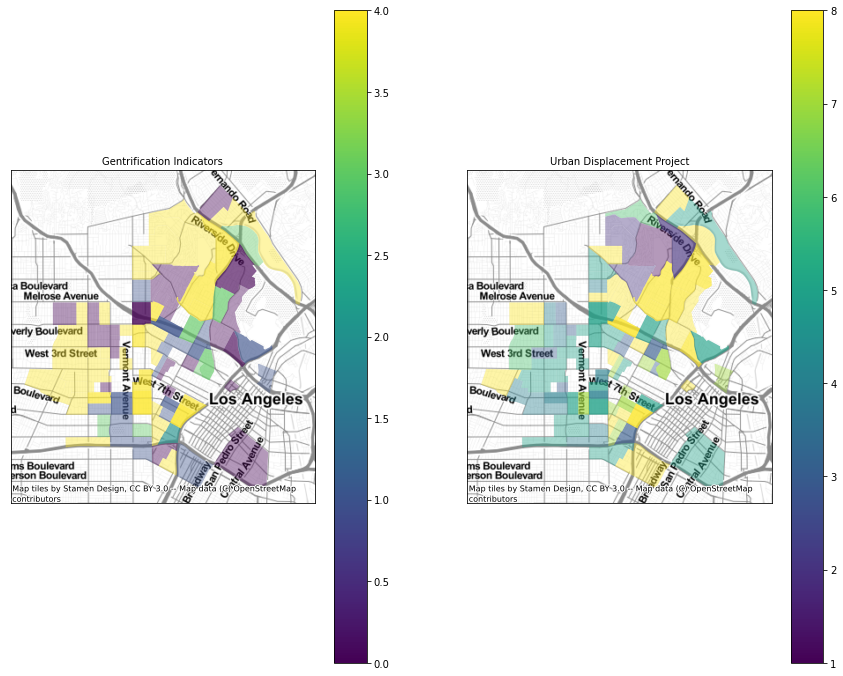

In [441]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

ax1, ax2 = axs

variablesGdf_final.to_crs('EPSG:3857').plot('cluster_id', legend=True, ax = ax1, alpha=0.4)
ctx.add_basemap(ax1, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Gentrification Indicators', fontsize=10)


variablesGdf_final.to_crs('EPSG:3857').plot('Typology_numeric', legend=True, ax = ax2, alpha=0.4)
ctx.add_basemap(ax2, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Urban Displacement Project', fontsize=10)

In [442]:
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology']

In [443]:
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Advanced Gentrification'],
                                                                                        '4')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['At Risk of Gentrification'],
                                                                                        '4')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Becoming Exclusive'],
                                                                                        '3')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Early/Ongoing Gentrification'],
                                                                                        '3')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Low-Income/Susceptible to Displacement'],
                                                                                        '2')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Ongoing Displacement'],
                                                                                        '2')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Stable Moderate/Mixed Income'],
                                                                                        '1')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Stable/Advanced Exclusive'],
                                                                                        '1')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Unavailable or Unreliable Data'],
                                                                                        '0')

In [444]:
variablesGdf_final['Typology_numeric2'] = variablesGdf_final.Typology_numeric2.astype(float)

I reevaluate the maps after converting the UDP map to a 4 point scale. It is important to remember that the 2 maps are not directly comparable: while the UDP map shows gentrification stage, the cluster map just shows groupings of census tracts based on the percent change indicators we selected. As I mentioned previously, clusters 0 and 4 appear to be the most stable over time, while clusters 1, 2, and 3 experienced greater change. There appears to be some overlap in the concetration of clusters 1-3 and escalating gentrification in the southwest part of the map. Perhaps this means that a large increase in the percent with bachelor's degrees and the white population are more prominent indicators of gentrification then, say, rent increases or decreases in household size. 

Text(0.5, 1.0, 'Urban Displacement Project')

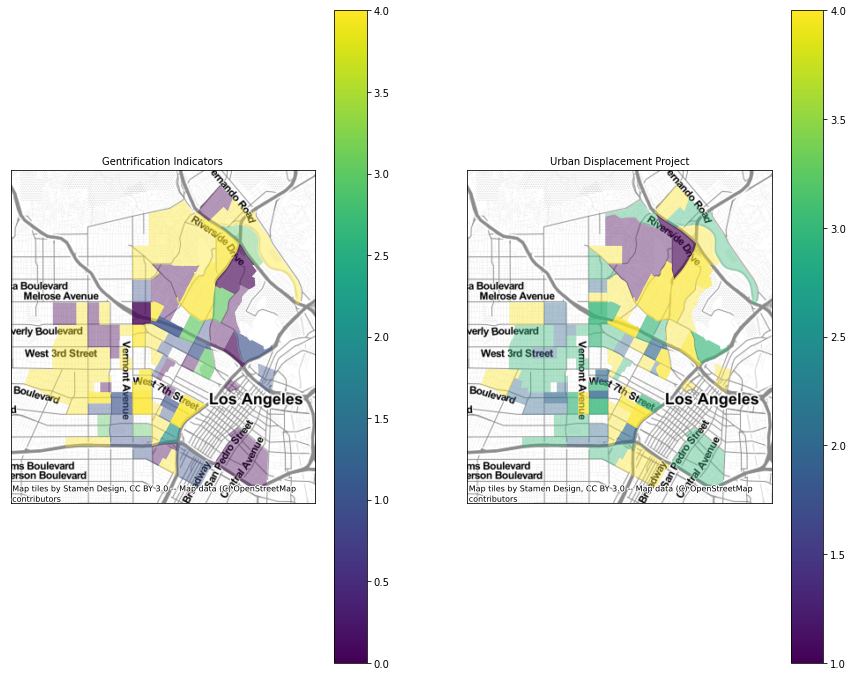

In [445]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

ax1, ax2 = axs

variablesGdf_final.to_crs('EPSG:3857').plot('cluster_id', legend=True, ax = ax1, alpha=0.4)
ctx.add_basemap(ax1, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Gentrification Indicators', fontsize=10)


variablesGdf_final.to_crs('EPSG:3857').plot('Typology_numeric2', legend=True, ax = ax2, alpha=0.4)
ctx.add_basemap(ax2, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Urban Displacement Project', fontsize=10)

## Cluster Round 2

I re-do the cluster analysis with 10 clusters instead of 5. I then create a new radar plot.

In [446]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(variablesGdf2)

In [447]:
print(kmeans.labels_.shape)
print(len(variablesGdf2))

(128,)
128


In [448]:
variablesGdf2['cluster_id2'] = kmeans.labels_

In [449]:
variablesGdf2.groupby('cluster_id2').size()

cluster_id2
0    23
1     6
2    17
3     2
4     8
5    16
6     4
7    10
8    34
9     8
dtype: int64

In [450]:
variablesGdf2

,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id2
0,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2
1,-0.139194,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439,8
2,0.003922,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059,0
3,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466,5
4,-0.051724,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777,6
...,...,...,...,...,...,...,...,...,...,...
127,-0.107784,0.432039,0.055124,0.818795,0.418684,0.452437,0.132920,0.485507,2.308710,9
128,-0.142857,0.191313,-0.122242,0.439254,2.580590,0.149347,1.859356,-0.411594,0.563381,1
130,-0.110837,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833,2
131,0.130435,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598,8


In [451]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [452]:
def radar_plot(kmeans, variablesGdf2):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in variablesGdf2.columns if col!='cluster_id2']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

This 10 cluster radar plot builds off of the previous 5 cluster plot. We still have a cluster (in this case cluster 3) that has an extremely high percent change in people with bachelor's degrees. Cluster 6 has a high percent change in nonfamily income with and without inflation. Cluster 4 has the highest percent change in white population. In general, this plot is much harder to read because there is so much going on. For this reason, I stick with the 5 clusters moving forward. 

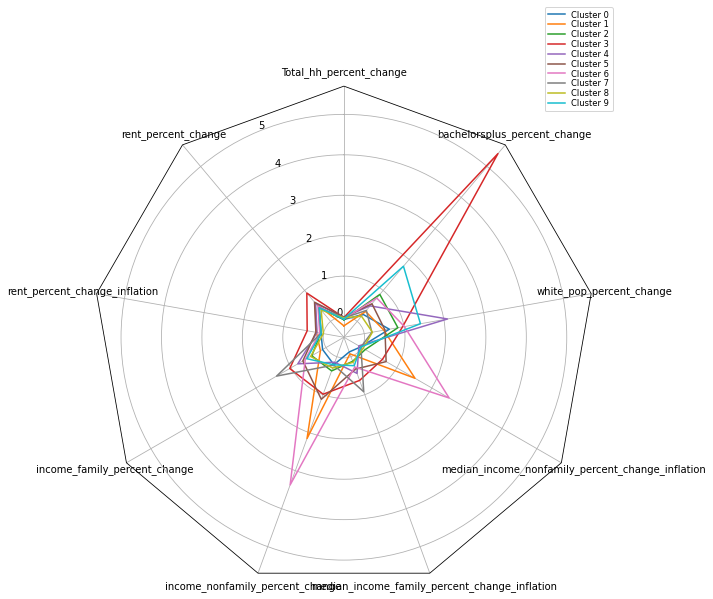

In [453]:
radar_plot (kmeans, variablesGdf2)

## Spatial Clustering

I initially created a spatial cluster of the census tract centroids; however, I didn't find the results particularly interesting or illuminating so decided to comment this code out. 

In [454]:
#from shapely.geometry import Polygon, LineString, Point

In [455]:
#variablesGdf_final['point'] = variablesGdf_final.centroid

In [456]:
#variablesGdf_final = variablesGdf_final.rename(columns={'geometry':'geometry1'})

In [457]:
#variablesGdf_final = variablesGdf_final.rename(columns={'point':'geometry'})

In [458]:
#variablesGdf_final.geometry

In [459]:
#variablesGdf_final['lon'] = variablesGdf_final['geometry'].x
#variablesGdf_final['lat'] = variablesGdf_final['geometry'].y

In [460]:
#variablesGdf_final.dropna(subset='lat', inplace=True)
#variablesGdf_final.dropna(subset='lon', inplace=True)

In [461]:
#variablesGdf_final

In [462]:
#variablesGdf_final = variablesGdf_final.drop(columns=['geometry1'])

In [463]:
#variablesGdf_final.plot()

In [464]:
#from sklearn.cluster import KMeans

#kmeans = KMeans(n_clusters=10, random_state=1).fit(variablesGdf_final[['lat','lon']])
#variablesGdf_final['cluster_id'] = kmeans.labels_
#variablesGdf_final.head()

In [465]:
#variablesGdf_final = variablesGdf_final.to_crs('EPSG:3857')

In [466]:
#import matplotlib.pyplot as plt
#import contextily as ctx

#fig, ax = plt.subplots(figsize=(10,10))
#variablesGdf_final.plot('cluster_id', categorical=True, legend=False, 
 #                                  ax=ax, alpha=0.4)

#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
#ax.set_title('Gentrification indicator clusters', fontsize=20)                           
#ax.set_ylim([3.98e6, 4.14e6])
#ax.set_xticks([])
#ax.set_yticks([])

## Cluster Round 3

I also attempted a cluster analysis using the latitude and longitude coordinates of each census tract. Because the coordinates are all fairly similar, this did not make for an interesting radar map. The end result was essentially identical circles layered on top of one another. For this reason, I commented this code out. 

In [467]:
#variablesGdf_final1 = variablesGdf_final.drop(columns={'name', 'geometry', 'GEOID', 'Typology', 'cluster_id', 'Typology_numeric', 'Typology_numeric2'})

In [468]:
#from sklearn.cluster import KMeans

In [469]:
#kmeans = KMeans(n_clusters=5, random_state=0).fit(variablesGdf_final1)
#print(kmeans)

In [470]:
#kmeans.labels_

In [471]:
#print(kmeans.labels_.shape)
#print(len(variablesGdf_final1))

In [472]:
#variablesGdf_final1['cluster_id'] = kmeans.labels_

In [473]:
#variablesGdf_final1.groupby('cluster_id').size()

In [474]:
#import numpy as np

#import matplotlib.pyplot as plt
#from matplotlib.patches import Circle, RegularPolygon
#from matplotlib.path import Path
#from matplotlib.projections.polar import PolarAxes
#from matplotlib.projections import register_projection
#from matplotlib.spines import Spine
#from matplotlib.transforms import Affine2D


#def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
 #   theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

  #  class RadarAxes(PolarAxes):

   #     name = 'radar'
        # use 1 line segment to connect specified points
    #    RESOLUTION = 1

     #   def __init__(self, *args, **kwargs):
      #      super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
       #     self.set_theta_zero_location('N')

        #def fill(self, *args, closed=True, **kwargs):
         #   """Override fill so that line is closed by default"""
          #  return super().fill(closed=closed, *args, **kwargs)

        #def plot(self, *args, **kwargs):
         #   """Override plot so that line is closed by default"""
          #  lines = super().plot(*args, **kwargs)
           # for line in lines:
            #    self._close_line(line)

        #def _close_line(self, line):
         #   x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
          #  if x[0] != x[-1]:
           #     x = np.append(x, x[0])
            #    y = np.append(y, y[0])
             #   line.set_data(x, y)

        #def set_varlabels(self, labels):
         #   self.set_thetagrids(np.degrees(theta), labels)

        #def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
         #   if frame == 'circle':
          #      return Circle((0.5, 0.5), 0.5)
          #  elif frame == 'polygon':
           #     return RegularPolygon((0.5, 0.5), num_vars,
            #                          radius=.5, edgecolor="k")
            #else:
             #   raise ValueError("Unknown value for 'frame': %s" % frame)

        #def _gen_axes_spines(self):
         #   if frame == 'circle':
          #      return super()._gen_axes_spines()
           # elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
            #    spine = Spine(axes=self,
             #                 spine_type='circle',
              #                path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
               # spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                #                    + self.transAxes)
                #return {'polar': spine}
            #else:
             #   raise ValueError("Unknown value for 'frame': %s" % frame)

    #register_projection(RadarAxes)
    #return theta

IndentationError: unexpected indent (3327360570.py, line 13)

In [475]:
#def radar_plot(kmeans, variablesGdf_final1):
 #   N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
  #  k = kmeans.n_clusters
   # theta = radar_factory(N, frame='polygon')
    #data = kmeans.cluster_centers_.T
    #spoke_labels = [col for col in variablesGdf_final1.columns if col!='cluster_id']
    #fig, ax = plt.subplots(figsize=(9, 9),
     #                           subplot_kw=dict(projection='radar'))
    #fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

  #  ax.plot(theta, data) #, color=color)
   # ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    #labels = ['Cluster {}'.format(kk) for kk in range(k)]
    #ax.legend(labels, loc=(0.9, .95),
     #                           labelspacing=0.1, fontsize='small')

In [476]:
#radar_plot (kmeans, variablesGdf_final1)

### Cluster Round 4 

In this cluster analysis, I create dummy variables for each of the 6 neighborhoods of interest and include them in the analysis. I create a new radar plot and analyze it below. 

In [477]:
variablesGdf_final['Westlake'] = variablesGdf_final['name']
variablesGdf_final['Pico-Union'] = variablesGdf_final['name']
variablesGdf_final['Koreatown'] = variablesGdf_final['name']
variablesGdf_final['Echo Park'] = variablesGdf_final['name']
variablesGdf_final['Downtown'] = variablesGdf_final['name']
variablesGdf_final['Silver Lake'] = variablesGdf_final['name']

In [478]:
variablesGdf_final['Westlake'] = variablesGdf_final['Westlake'].replace(['Westlake'],'1')
variablesGdf_final['Westlake'] = variablesGdf_final['Westlake'].replace(['Pico-Union', 'Koreatown', 'Echo Park',
                                                                        'Downtown', 'Silver Lake'], '0')

In [479]:
variablesGdf_final['Pico-Union'] = variablesGdf_final['Pico-Union'].replace(['Pico-Union'],'1')
variablesGdf_final['Pico-Union'] = variablesGdf_final['Pico-Union'].replace(['Westlake', 'Koreatown', 'Echo Park',
                                                                        'Downtown', 'Silver Lake'], '0')

In [480]:
variablesGdf_final['Koreatown'] = variablesGdf_final['Koreatown'].replace(['Koreatown'],'1')
variablesGdf_final['Koreatown'] = variablesGdf_final['Koreatown'].replace(['Pico-Union', 'Westlake', 'Echo Park',
                                                                        'Downtown', 'Silver Lake'], '0')

In [481]:
variablesGdf_final['Echo Park'] = variablesGdf_final['Echo Park'].replace(['Echo Park'],'1')
variablesGdf_final['Echo Park'] = variablesGdf_final['Echo Park'].replace(['Pico-Union', 'Koreatown', 'Westlake',
                                                                        'Downtown', 'Silver Lake'], '0')

In [482]:
variablesGdf_final['Downtown'] = variablesGdf_final['Downtown'].replace(['Downtown'],'1')
variablesGdf_final['Downtown'] = variablesGdf_final['Downtown'].replace(['Pico-Union', 'Koreatown', 'Echo Park',
                                                                        'Westlake', 'Silver Lake'], '0')

In [483]:
variablesGdf_final['Silver Lake'] = variablesGdf_final['Silver Lake'].replace(['Silver Lake'],'1')
variablesGdf_final['Silver Lake'] = variablesGdf_final['Silver Lake'].replace(['Pico-Union', 'Koreatown', 'Echo Park',
                                                                        'Downtown', 'Westlake'], '0')

In [484]:
variablesGdf_subset = variablesGdf_final[['name', 'geometry', 'GEOID', 'Typology', 'Typology_numeric', 
                                         'Typology_numeric2']]

In [485]:
variablesGdf_final1 = variablesGdf_final.drop(columns={'name', 'geometry', 'GEOID', 'Typology', 'cluster_id', 'Typology_numeric', 'Typology_numeric2'})

In [486]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(variablesGdf_final1)
print(kmeans)

KMeans(n_clusters=5, random_state=0)


In [487]:
print(kmeans.labels_.shape)
print(len(variablesGdf_final1))

(128,)
128


In [488]:
variablesGdf_final1['cluster_id'] = kmeans.labels_

In [489]:
variablesGdf_final1.groupby('cluster_id').size()

cluster_id
0    10
1     2
2    56
3    26
4    34
dtype: int64

In [490]:
def radar_plot(kmeans, variablesGdf_final1):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in variablesGdf_final1.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

Interstingly, the radar plot changes a bit and the clusters become slighlty more evenly sized when I incorporate the neighborhood dummy variables. Cluster 0, which includes 10 census tracts, has a high percent change in nonfamily income with and without inflation. Cluster 1, which has only 2 census tracts, has an extremely high percent change in bachelor's degrees and a notably high percent change in family and nonfamily income and rent. Both census tracts are located in Downtown. Cluster 2 has 56 census tracts and appears pretty stable with more census tracts in Silver Lake. Cluster 3 has 26 census tracts and has a somewhat high percent change in white population. Cluster 4 has 34 census tracts and also appears stable with more census tracts in Koreatown. Like with the previous radar plot, 2 clusters (in this case clusters 2 and 4) appear stable and 3 clusters (clusters 0, 1, and 3) show greater signs of neighborhood change.  

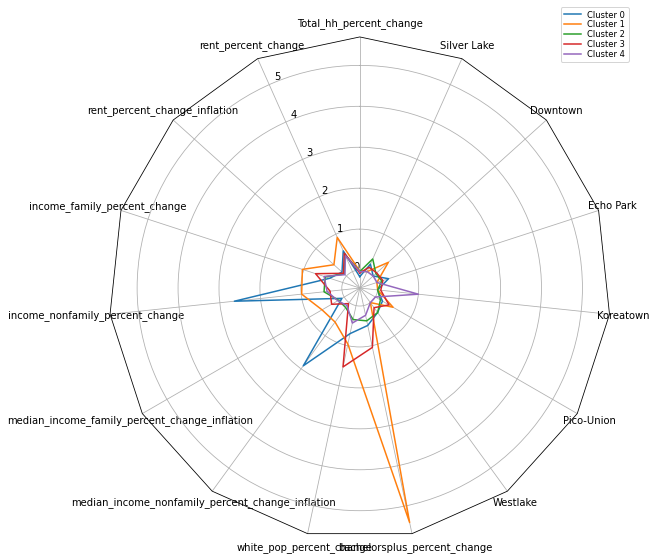

In [491]:
radar_plot (kmeans, variablesGdf_final1)

In [369]:
variablesGdf_final1 = variablesGdf_subset.join(variablesGdf_final1)

In [370]:
variablesGdf_final1

,name,geometry,GEOID,Typology,Typology_numeric,Typology_numeric2,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,...,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,Westlake,Pico-Union,Koreatown,Echo Park,Downtown,Silver Lake,cluster_id
0,Westlake,"POLYGON ((-118.27259 34.04308, -118.27243 34.0...",6.037210e+09,Advanced Gentrification,8.0,4.0,-0.090301,0.520134,0.120032,0.065907,...,0.367608,0.648831,0.916215,1,0,0,0,0,0,2
1,Westlake,"POLYGON ((-118.26652 34.04788, -118.26642 34.0...",6.037209e+09,Early/Ongoing Gentrification,5.0,3.0,-0.139194,0.270859,-0.063634,0.376511,...,-0.193537,-0.126527,0.011439,1,0,0,0,0,0,2
2,Westlake,"POLYGON ((-118.29051 34.07633, -118.29170 34.0...",6.037211e+09,Early/Ongoing Gentrification,5.0,3.0,0.003922,0.444040,0.063966,0.190279,...,0.061524,0.899744,0.113059,1,0,0,0,0,0,2
3,Westlake,"POLYGON ((-118.28442 34.07715, -118.28442 34.0...",6.037193e+09,Early/Ongoing Gentrification,5.0,3.0,0.060714,0.579470,0.163751,0.384261,...,0.899697,0.545329,0.577466,1,0,0,0,0,0,2
4,Westlake,"POLYGON ((-118.25966 34.06201, -118.25974 34.0...",6.037208e+09,At Risk of Gentrification,7.0,4.0,-0.051724,0.361851,0.003410,0.682266,...,2.403152,0.975671,0.734777,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Pico-Union,"POLYGON ((-118.28402 34.03683, -118.28402 34.0...",6.037222e+09,Early/Ongoing Gentrification,5.0,3.0,-0.107784,0.432039,0.055124,0.818795,...,0.132920,0.485507,2.308710,0,1,0,0,0,0,3
124,Pico-Union,"POLYGON ((-118.28413 34.04184, -118.28414 34.0...",6.037221e+09,Low-Income/Susceptible to Displacement,4.0,2.0,-0.142857,0.191313,-0.122242,0.439254,...,1.859356,-0.411594,0.563381,0,1,0,0,0,0,0
125,Pico-Union,"POLYGON ((-118.27668 34.04519, -118.27651 34.0...",6.037210e+09,Advanced Gentrification,8.0,4.0,-0.110837,0.253197,-0.076647,0.688634,...,-0.233638,1.007048,0.903833,0,1,0,0,0,0,3
126,Pico-Union,"POLYGON ((-118.28041 34.04819, -118.28061 34.0...",6.037210e+09,At Risk of Gentrification,7.0,4.0,0.130435,0.458671,0.074746,0.181293,...,0.128524,0.229048,0.036598,0,1,0,0,0,0,2


When I re-map the clusters next to the UDP map, greater patterns emerge. Cluster 4 (more stable census tracts) is concentrated in Koreatown/Pico-Union. On the UDP map, this area has medium and rising gentrification/displacement risk. Cluster 3 (which has a high percent change in white population) is clustered in the southwest area, which is Pico-Union/Westlake. On the UDP map, this area has medium to high gentrification/displacement risk. Cluster 2 (more stable census tracts) is concentrated in Silver Lake, which correlates with the stable moderate/stable exclusive typology on the UDP map. Cluster 1 (census tracts with extremely high percent change in bachelor's degrees and a notably high percent change in family and nonfamily income and rents) is located in Downtown. The UDP map shows this area as at risk/advanced gentrification. Lastly, Cluster 0 (census tracts with a high percent change in nonfamily income with and without inflation) is distributed across the map and does not translate easily onto the UDP map. We discuss the implications of these findings further in the final notebook. 

Text(0.5, 1.0, 'Urban Displacement Project: Displacement Risk Index')

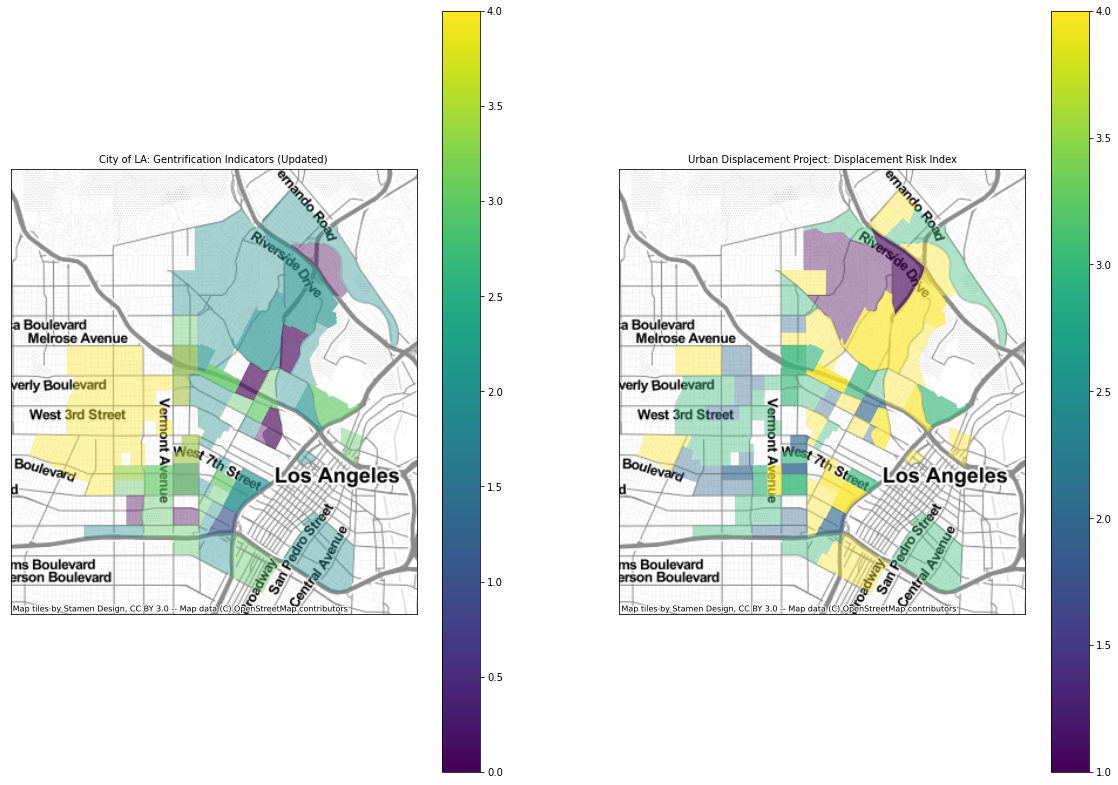

In [371]:
fig, axs = plt.subplots(1, 2, figsize=(20, 14), sharex=True, sharey=True)

ax1, ax2 = axs

variablesGdf_final1.to_crs('EPSG:3857').plot('cluster_id', legend=True, ax = ax1, alpha=0.4)
ctx.add_basemap(ax1, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('City of LA: Gentrification Indicators (Updated)', fontsize=10)


variablesGdf_final1.to_crs('EPSG:3857').plot('Typology_numeric2', legend=True, ax = ax2, alpha=0.4)
ctx.add_basemap(ax2, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Urban Displacement Project: Displacement Risk Index', fontsize=10)

In [372]:
variablesGdf_final1 = variablesGdf_final1.drop(columns={'cluster_id'})

In [373]:
variablesGdf_final1 = gpd.GeoDataFrame(variablesGdf_final1, geometry='geometry')

In [374]:
variablesGdf_final1.to_file('Full_variable_list_5.30.22.geojson', driver='GeoJSON')

/Users/micaobrien/opt/anaconda3/envs/uds/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [492]:
gdf = gpd.read_file('landvalue_pctchange.geojson')

Text(0.5, 1.0, 'Percent Change in Land Value')

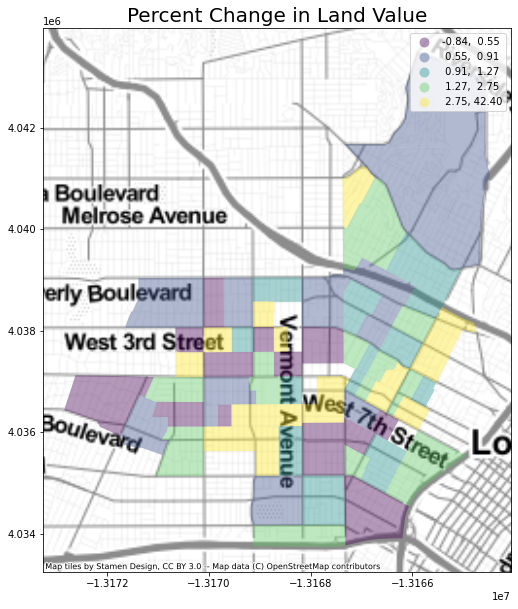

In [496]:
fig, ax = plt.subplots(figsize=(10,10))

gdf.to_crs('EPSG:3857').plot('pct_change_w_inflation', legend=True, scheme='quantiles', ax = ax, alpha=0.4)
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax.set_title('Percent Change in Land Value', fontsize=20)

In [499]:
fig, axs = plt.subplots(0, 1, 2, figsize=(20, 14), sharex=True, sharey=True)

ax1, ax2, ax3 = axs

variablesGdf_final1.to_crs('EPSG:3857').plot('cluster_id', legend=True, ax = ax1, alpha=0.4)
ctx.add_basemap(ax1, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('City of LA: Gentrification Indicators (Updated)', fontsize=10)


variablesGdf_final1.to_crs('EPSG:3857').plot('Typology_numeric2', legend=True, ax = ax2, alpha=0.4)
ctx.add_basemap(ax2, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Urban Displacement Project: Displacement Risk Index', fontsize=10)


gdf.to_crs('EPSG:3857').plot('pct_change_w_inflation', legend=True, scheme='quantiles', ax = ax3, alpha=0.4)
ctx.add_basemap(ax3, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax3.set_title('Percent Change in Land Value', fontsize=20)

TypeError: subplots() takes from 0 to 2 positional arguments but 3 positional arguments (and 2 keyword-only arguments) were given